# Import Library
Library yang digunakan dalam project ini adalah numpy, pandas, matplotlib, seaborn dan scikit learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# Data Loading
data bersumber dari https://data.jakarta.go.id/dataset/data-jumlah-penduduk-provinsi-dki-jakarta-berdasarkan-kelompok-usia-per-kelurahan 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fachriomee/datapendudukdki/main/data-jumlah-penduduk.csv')
data.head()

tahun         nama_provinsi nama_kabupaten_kota   nama_kecamatan  \
0   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
1   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
2   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
3   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   
4   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   

   nama_kelurahan usia jenis_kelamin  jumlah_penduduk Unnamed: 8  
0     P. PANGGANG  0-4     Laki-laki              279        NaN  
1       P. KELAPA  0-4     Laki-laki              116        NaN  
2      P. HARAPAN  0-4     Laki-laki              297        NaN  
3  P. UNTUNG JAWA  0-4     Laki-laki              199        NaN  
4       P. TIDUNG  0-4     Laki-laki               97        NaN

# Data Wrangling
Bertujuan untuk membersihkan data sehingga data dapat di olah untuk keperluan *Explanatory Data Analysis*

- Checking Data Info



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64862 entries, 0 to 64861
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tahun                64862 non-null  int64 
 1   nama_provinsi        64862 non-null  object
 2   nama_kabupaten_kota  64862 non-null  object
 3   nama_kecamatan       64862 non-null  object
 4   nama_kelurahan       64862 non-null  object
 5   usia                 64862 non-null  object
 6   jenis_kelamin        64862 non-null  object
 7   jumlah_penduduk      64862 non-null  int64 
 8   Unnamed: 8           2 non-null      object
dtypes: int64(2), object(7)
memory usage: 4.5+ MB


- Menghapus kolom Unnamed karena tidak dibutuhkan dalam EDA

In [ ]:
data.drop(columns = 'Unnamed: 8', inplace=True)

In [ ]:
data.head()

tahun         nama_provinsi nama_kabupaten_kota   nama_kecamatan  \
0   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
1   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
2   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR   
3   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   
4   2013  PROVINSI DKI JAKARTA  KAB.ADM.KEP.SERIBU  KEP. SERIBU SLT   

   nama_kelurahan usia jenis_kelamin  jumlah_penduduk  
0     P. PANGGANG  0-4     Laki-laki              279  
1       P. KELAPA  0-4     Laki-laki              116  
2      P. HARAPAN  0-4     Laki-laki              297  
3  P. UNTUNG JAWA  0-4     Laki-laki              199  
4       P. TIDUNG  0-4     Laki-laki               97

- Check Duplicate Values



In [ ]:
data.duplicated().any()

True

- Check Missig Values

In [ ]:
data.isnull().sum()

tahun                  0
nama_provinsi          0
nama_kabupaten_kota    0
nama_kecamatan         0
nama_kelurahan         0
usia                   0
jenis_kelamin          0
jumlah_penduduk        0
dtype: int64

- Menggrouping data dan memasukkannya ke dalam variabel baru berdasarkan jumlah penduduk

In [ ]:
df = data.groupby(['tahun', 'nama_provinsi','nama_kabupaten_kota','nama_kecamatan','usia'])['jumlah_penduduk'].sum().reset_index()
df

tahun         nama_provinsi    nama_kabupaten_kota  \
0      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
1      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
2      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
3      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
4      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
5      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
6      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
7      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
8      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
9      2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
10     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
11     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
12     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
13     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
14     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
15     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
16     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
17     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
18     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
19     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
20     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
21     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
22     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
23     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
24     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
25     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
26     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
27     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
28     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
29     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
30     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
31     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
32     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
33     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
34     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
35     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
36     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
37     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
38     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
39     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
40     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
41     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
42     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
43     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
44     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
45     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
46     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
47     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
48     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
49     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
50     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
51     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
52     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
53     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
54     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
55     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
56     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
57     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
58     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
59     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
60     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
61     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
62     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
63     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
64     2013  PROVINSI DKI JAKARTA          JAKARTA BARAT   
65     2013  PROVINSI DKI JAKARTA          JAK

- Merapikan isi kolom usia dari data yang kotor

In [ ]:
df.loc[ df['usia'] == '0-4', 'usia'] = '00-04'
df.loc[ df['usia'] == '0-4 ', 'usia'] = '00-04'
df.loc[ df['usia'] == '14-Oct', 'usia'] = '10-14'
df.loc[ df['usia'] == '9-May', 'usia'] = '05-09'
df.loc[ df['usia'] == '5-9', 'usia'] = '05-09'
df.loc[ df['usia'] == '20-24 ', 'usia'] = '20-24'
df.loc[ df['usia'] == '25-29 ', 'usia'] = '25-29'
df.loc[ df['usia'] == '30-34 ', 'usia'] = '30-34'
df.loc[ df['usia'] == '35-39 ', 'usia'] = '35-39'
df.loc[ df['usia'] == '40-44 ', 'usia'] = '40-44'
df.loc[ df['usia'] == '45-49 ', 'usia'] = '45-49'
df.loc[ df['usia'] == '50-54 ', 'usia'] = '50-54'
df.loc[ df['usia'] == '55-59 ', 'usia'] = '55-59'
df.loc[ df['usia'] == '60-64 ', 'usia'] = '60-64'
df.loc[ df['usia'] == '65-69 ', 'usia'] = '65-69'
df.loc[ df['usia'] == '>65','usia'] = '65-69'
df.loc[ df['usia'] == '>75', 'usia'] = '75+'
df.loc[ df['usia'] == '70-74 ', 'usia'] = '70-74'
df.loc[ df['usia'] == '>75 ', 'usia'] = '75+'
df.loc[ df['usia'] == '75-ke atas', 'usia'] = '75+'

Data di kolom usia masih berantakan dan ada yang duplikat namun dibedakan oleh spasi atau huruf dsb, sehingga akan dilakukan pengelompokan dan penyesuaian setiap kelompok usia berdasarkan informasi dibawah ini.

Menurut Bappenas:
- Di bawah 15 tahun: Kelompok usia anak-anak.
'0-4', '14-Oct','9-May','0-4 ','10-14', '5-9','00-04', '05-09'
- 15-24 tahun: Kelompok usia muda.
'15-19', '20-24', '20-24 '
- 25-34 tahun: Kelompok usia pekerja awal.
'25-29', '25-29 ','30-34','30-34 '
- 35-44 tahun: Kelompok usia paruh baya.
'35-39', '35-39 ','40-44','40-44 '
- 45-54 tahun: Kelompok usia pra-pensiun.
'45-49 ', '50-54 ', '45-49', '50-54'
- 55-64 tahun: Kelompok usia pensiun.
'55-59', '60-64', '55-59 ', '60-64 '
- 65 tahun ke atas: Kelompok usia lanjut.
'65-69', '70-74', '>75',  '65-69 ', '70-74 ', '>75 ', '>65' , '75-ke atas' ,'75+'

- Kolom usia sudah selesai dirapikan

In [ ]:
df['usia'].unique()

array(['00-04', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '05-09', '75+'], dtype=object)

- Mengelompokkan usia berdasarkan kategori dari Bappenas

In [ ]:
anak = ['00-04','05-09','10-14']
muda = ['15-19','20-24']
pekerja_awal = ['25-29','30-34']
paruh_baya = ['35-39', '40-44']
pra_pensiun = ['45-49','50-54']
pensiun = ['55-59','60-64']
lanjut_usia = ['65-69', '70-74', '75+']

In [ ]:
def kelompok_usia(x):
    if x['usia'] in anak:
        return 'Anak'
    elif x['usia'] in muda:
        return 'Muda'
    elif x['usia'] in pekerja_awal:
        return 'Pekerja Awal'
    elif x['usia'] in paruh_baya:
        return 'Paruh Baya'
    elif x['usia'] in pra_pensiun:
        return 'Pra Pensiun'
    elif x['usia'] in pensiun:
        return 'Pensiun' 
    elif x['usia'] in lanjut_usia:
        return 'Lanjut Usia'

df['kelompok_usia'] = df.apply(lambda x: kelompok_usia(x), axis=1)

In [ ]:
df.head()

tahun         nama_provinsi nama_kabupaten_kota nama_kecamatan   usia  \
0   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  00-04   
1   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  10-14   
2   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  15-19   
3   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  20-24   
4   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  25-29   

   jumlah_penduduk kelompok_usia  
0            42750          Anak  
1            68670          Anak  
2            42869          Muda  
3            62213          Muda  
4            55788  Pekerja Awal

- Membuat kolom baru yang mengklasifikasikan penduduk ke dalam kategori produktif dan tidak produktif 

In [ ]:
def produktivitas(x):
    if x['kelompok_usia'] in ['Anak','Lanjut_Usia']:
        return 'Tidak Produktif'
    else:
        return 'Produktif'

df['produktivitas'] = df.apply(lambda x: produktivitas(x), axis=1)

In [ ]:
df.head()

tahun         nama_provinsi nama_kabupaten_kota nama_kecamatan   usia  \
0   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  00-04   
1   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  10-14   
2   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  15-19   
3   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  20-24   
4   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG  25-29   

   jumlah_penduduk kelompok_usia    produktivitas  
0            42750          Anak  Tidak Produktif  
1            68670          Anak  Tidak Produktif  
2            42869          Muda        Produktif  
3            62213          Muda        Produktif  
4            55788  Pekerja Awal        Produktif

- Merapikan nama kecamatan yang tercatat secara berantakan

In [ ]:
df.loc[ df['nama_provinsi'] == 'PROVINSI DKI JAKARTA', 'nama_provinsi'] = 'DKI Jakarta'
df.loc[ df['nama_kabupaten_kota'] == 'KAB.ADM.KEP.SERIBU', 'nama_kabupaten_kota'] = 'ADM. KEPULAUAN SERIBU'
df.loc[ df['nama_kecamatan'] == 'S E N E N', 'nama_kecamatan'] = 'SENEN'
df.loc[ df['nama_kecamatan'] == 'KEP. SERIBU SLT', 'nama_kecamatan'] = 'KEPULAUAN SERIBU SELATAN'
df.loc[ df['nama_kecamatan'] == 'KEP. SERIBU UTR', 'nama_kecamatan'] = 'KEPULAUAN SERIBU UTARA'
df.loc[ df['nama_kecamatan'] == 'KRAMATJATI', 'nama_kecamatan'] = 'KRAMAT JATI'
df.loc[ df['nama_kecamatan'] == 'PAL MERAH', 'nama_kecamatan'] = 'PALMERAH'

In [ ]:
df['nama_kecamatan'].unique()

array(['CENGKARENG', 'GROGOL PETAMBURAN', 'KALI DERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'TAMAN SARI', 'TAMBORA', 'CEMPAKA PUTIH',
       'GAMBIR', 'JOHAR BARU', 'KEMAYORAN', 'MENTENG', 'SAWAH BESAR',
       'SENEN', 'TANAH ABANG', 'CILANDAK', 'JAGAKARSA', 'KEBAYORAN BARU',
       'KEBAYORAN LAMA', 'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU',
       'PESANGGRAHAN', 'SETIA BUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG',
       'CIRACAS', 'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR',
       'MATRAMAN', 'PASAR REBO', 'PULO GADUNG', 'CILINCING',
       'KELAPA GADING', 'KOJA', 'PADEMANGAN', 'PENJARINGAN',
       'TANJUNG PRIOK', 'KEPULAUAN SERIBU SELATAN',
       'KEPULAUAN SERIBU UTARA'], dtype=object)

In [ ]:
df_copy = df.groupby(['tahun', 'nama_provinsi','nama_kabupaten_kota','nama_kecamatan','kelompok_usia','usia'])['jumlah_penduduk'].sum().reset_index()

In [ ]:
df = df.groupby(['tahun', 'nama_provinsi','nama_kabupaten_kota','nama_kecamatan','kelompok_usia'])['jumlah_penduduk'].sum().reset_index()

In [ ]:
df_copy

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
0      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
1      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
2      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
3      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
4      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
5      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
6      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
7      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
8      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
9      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
10     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
11     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
12     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
13     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
14     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
15     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
16     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
17     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
18     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
19     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
20     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
21     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
22     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
23     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
24     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
25     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
26     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
27     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
28     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
29     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
30     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
31     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
32     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
33     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
34     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
35     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
36     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
37     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
38     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
39     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
40     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
41     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
42     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
43     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
44     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
45     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
46     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
47     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
48     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
49     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
50     2013   DKI Jakarta   

In [ ]:
df

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
0      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
1      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
2      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
3      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
4      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
5      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
6      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
7      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
8      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
9      2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
10     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
11     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
12     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
13     2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
14     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
15     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
16     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
17     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
18     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
19     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
20     2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
21     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
22     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
23     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
24     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
25     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
26     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
27     2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
28     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
29     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
30     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
31     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
32     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
33     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
34     2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   
35     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
36     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
37     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
38     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
39     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
40     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
41     2013   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
42     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
43     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
44     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
45     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
46     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
47     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
48     2013   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
49     2013   DKI Jakarta          JAKARTA BARAT                  PALMERAH   
50     2013   DKI Jakarta   

- Mengisi kolom jumlah penduduk yang kosong

In [ ]:
temp = df[((df['tahun']==2013) & (df['kelompok_usia'] == 'Anak')) | ((df['tahun']==2013) &(df['kelompok_usia']=='Lanjut Usia'))].reset_index()
temp.drop(columns='index', inplace=True)
temp['tahun'] = temp['tahun'].replace([2013],2017)
temp.loc[temp['jumlah_penduduk'] > 1, 'jumlah_penduduk'] = 0

In [ ]:
temp

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
0    2017   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
1    2017   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
2    2017   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
3    2017   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
4    2017   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
5    2017   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
6    2017   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
7    2017   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
8    2017   DKI Jakarta          JAKARTA BARAT                KALI DERES   
9    2017   DKI Jakarta          JAKARTA BARAT                KALI DERES   
10   2017   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
11   2017   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
12   2017   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
13   2017   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
14   2017   DKI Jakarta          JAKARTA BARAT                  PALMERAH   
15   2017   DKI Jakarta          JAKARTA BARAT                  PALMERAH   
16   2017   DKI Jakarta          JAKARTA BARAT                TAMAN SARI   
17   2017   DKI Jakarta          JAKARTA BARAT                TAMAN SARI   
18   2017   DKI Jakarta          JAKARTA BARAT                   TAMBORA   
19   2017   DKI Jakarta          JAKARTA BARAT                   TAMBORA   
20   2017   DKI Jakarta          JAKARTA PUSAT             CEMPAKA PUTIH   
21   2017   DKI Jakarta          JAKARTA PUSAT             CEMPAKA PUTIH   
22   2017   DKI Jakarta          JAKARTA PUSAT                    GAMBIR   
23   2017   DKI Jakarta          JAKARTA PUSAT                    GAMBIR   
24   2017   DKI Jakarta          JAKARTA PUSAT                JOHAR BARU   
25   2017   DKI Jakarta          JAKARTA PUSAT                JOHAR BARU   
26   2017   DKI Jakarta          JAKARTA PUSAT                 KEMAYORAN   
27   2017   DKI Jakarta          JAKARTA PUSAT                 KEMAYORAN   
28   2017   DKI Jakarta          JAKARTA PUSAT                   MENTENG   
29   2017   DKI Jakarta          JAKARTA PUSAT                   MENTENG   
30   2017   DKI Jakarta          JAKARTA PUSAT               SAWAH BESAR   
31   2017   DKI Jakarta          JAKARTA PUSAT               SAWAH BESAR   
32   2017   DKI Jakarta          JAKARTA PUSAT                     SENEN   
33   2017   DKI Jakarta          JAKARTA PUSAT                     SENEN   
34   2017   DKI Jakarta          JAKARTA PUSAT               TANAH ABANG   
35   2017   DKI Jakarta          JAKARTA PUSAT               TANAH ABANG   
36   2017   DKI Jakarta        JAKARTA SELATAN                  CILANDAK   
37   2017   DKI Jakarta        JAKARTA SELATAN                  CILANDAK   
38   2017   DKI Jakarta        JAKARTA SELATAN                 JAGAKARSA   
39   2017   DKI Jakarta        JAKARTA SELATAN                 JAGAKARSA   
40   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN BARU   
41   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN BARU   
42   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN LAMA   
43   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN LAMA   
44   2017   DKI Jakarta        JAKARTA SELATAN          MAMPANG PRAPATAN   
45   2017   DKI Jakarta        JAKARTA SELATAN          MAMPANG PRAPATAN   
46   2017   DKI Jakarta        JAKARTA SELATAN                  PANCORAN   
47   2017   DKI Jakarta        JAKARTA SELATAN                  PANCORAN   
48   2017   DKI Jakarta        JAKARTA SELATAN              PASAR MINGGU   
49   2017   DKI Jakarta        JAKARTA SELATAN              PASAR MINGGU   
50   2017   DKI Jakarta        JAKARTA SELATAN              PESANGGRAHAN   
51   2017   DKI Jakarta        JAKARTA SELATAN      

In [ ]:
df = pd.concat([df,temp],ignore_index=True)

In [ ]:
df = df.sort_values(['tahun', 'kelompok_usia'])
#df.drop(columns='level_0',inplace=True)
df.head()

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
0    2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
7    2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
14   2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
21   2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
28   2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   

   kelompok_usia  jumlah_penduduk  
0           Anak             2785  
7           Anak             4333  
14          Anak           178052  
21          Anak            68746  
28          Anak           140162

In [ ]:
df[df['jumlah_penduduk']==0]

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
2388   2017   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
2390   2017   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
2392   2017   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
2394   2017   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
2396   2017   DKI Jakarta          JAKARTA BARAT                KALI DERES   
2398   2017   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
2400   2017   DKI Jakarta          JAKARTA BARAT                 KEMBANGAN   
2402   2017   DKI Jakarta          JAKARTA BARAT                  PALMERAH   
2404   2017   DKI Jakarta          JAKARTA BARAT                TAMAN SARI   
2406   2017   DKI Jakarta          JAKARTA BARAT                   TAMBORA   
2408   2017   DKI Jakarta          JAKARTA PUSAT             CEMPAKA PUTIH   
2410   2017   DKI Jakarta          JAKARTA PUSAT                    GAMBIR   
2412   2017   DKI Jakarta          JAKARTA PUSAT                JOHAR BARU   
2414   2017   DKI Jakarta          JAKARTA PUSAT                 KEMAYORAN   
2416   2017   DKI Jakarta          JAKARTA PUSAT                   MENTENG   
2418   2017   DKI Jakarta          JAKARTA PUSAT               SAWAH BESAR   
2420   2017   DKI Jakarta          JAKARTA PUSAT                     SENEN   
2422   2017   DKI Jakarta          JAKARTA PUSAT               TANAH ABANG   
2424   2017   DKI Jakarta        JAKARTA SELATAN                  CILANDAK   
2426   2017   DKI Jakarta        JAKARTA SELATAN                 JAGAKARSA   
2428   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN BARU   
2430   2017   DKI Jakarta        JAKARTA SELATAN            KEBAYORAN LAMA   
2432   2017   DKI Jakarta        JAKARTA SELATAN          MAMPANG PRAPATAN   
2434   2017   DKI Jakarta        JAKARTA SELATAN                  PANCORAN   
2436   2017   DKI Jakarta        JAKARTA SELATAN              PASAR MINGGU   
2438   2017   DKI Jakarta        JAKARTA SELATAN              PESANGGRAHAN   
2440   2017   DKI Jakarta        JAKARTA SELATAN                SETIA BUDI   
2442   2017   DKI Jakarta        JAKARTA SELATAN                     TEBET   
2444   2017   DKI Jakarta          JAKARTA TIMUR                    CAKUNG   
2446   2017   DKI Jakarta          JAKARTA TIMUR                  CIPAYUNG   
2448   2017   DKI Jakarta          JAKARTA TIMUR                   CIRACAS   
2450   2017   DKI Jakarta          JAKARTA TIMUR               DUREN SAWIT   
2452   2017   DKI Jakarta          JAKARTA TIMUR                JATINEGARA   
2454   2017   DKI Jakarta          JAKARTA TIMUR               KRAMAT JATI   
2456   2017   DKI Jakarta          JAKARTA TIMUR                   MAKASAR   
2458   2017   DKI Jakarta          JAKARTA TIMUR                  MATRAMAN   
2460   2017   DKI Jakarta          JAKARTA TIMUR                PASAR REBO   
2462   2017   DKI Jakarta          JAKARTA TIMUR               PULO GADUNG   
2464   2017   DKI Jakarta          JAKARTA UTARA                 CILINCING   
2466   2017   DKI Jakarta          JAKARTA UTARA             KELAPA GADING   
2468   2017   DKI Jakarta          JAKARTA UTARA                      KOJA   
2470   2017   DKI Jakarta          JAKARTA UTARA                PADEMANGAN   
2472   2017   DKI Jakarta          JAKARTA UTARA               PENJARINGAN   
2474   2017   DKI Jakarta          JAKARTA UTARA             TANJUNG PRIOK   
2389   2017   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
2391   2017   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
2393   2017   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
2395   2017   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
2397   2017   DKI Jakarta          JAKARTA BARAT                KALI DERES   
2399   2017   DKI Jakarta          JAKARTA BARAT               KEBON JERUK   
2401   2017   DKI Jakarta   

In [ ]:
fq5 = df_copy[['nama_kecamatan','usia','kelompok_usia','jumlah_penduduk']].groupby(['nama_kecamatan','usia','kelompok_usia']).quantile(q=0.5).reset_index()
fq5

nama_kecamatan   usia kelompok_usia  jumlah_penduduk
0                      CAKUNG  00-04          Anak          45228.0
1                      CAKUNG  05-09          Anak          49805.0
2                      CAKUNG  10-14          Anak          44238.0
3                      CAKUNG  15-19          Muda          38188.0
4                      CAKUNG  20-24          Muda          39042.0
5                      CAKUNG  25-29  Pekerja Awal          42999.0
6                      CAKUNG  30-34  Pekerja Awal          51756.5
7                      CAKUNG  35-39    Paruh Baya          52438.5
8                      CAKUNG  40-44    Paruh Baya          43421.0
9                      CAKUNG  45-49   Pra Pensiun          33719.0
10                     CAKUNG  50-54   Pra Pensiun          27344.0
11                     CAKUNG  55-59       Pensiun          20931.5
12                     CAKUNG  60-64       Pensiun          13572.5
13                     CAKUNG  65-69   Lanjut Usia           6788.0
14                     CAKUNG  70-74   Lanjut Usia           3340.0
15                     CAKUNG    75+   Lanjut Usia           2331.5
16              CEMPAKA PUTIH  00-04          Anak           6901.0
17              CEMPAKA PUTIH  05-09          Anak           7872.0
18              CEMPAKA PUTIH  10-14          Anak           7886.0
19              CEMPAKA PUTIH  15-19          Muda           7688.0
20              CEMPAKA PUTIH  20-24          Muda           7056.0
21              CEMPAKA PUTIH  25-29  Pekerja Awal           6977.0
22              CEMPAKA PUTIH  30-34  Pekerja Awal           7952.5
23              CEMPAKA PUTIH  35-39    Paruh Baya           8673.0
24              CEMPAKA PUTIH  40-44    Paruh Baya           8641.0
25              CEMPAKA PUTIH  45-49   Pra Pensiun           8225.5
26              CEMPAKA PUTIH  50-54   Pra Pensiun           6879.5
27              CEMPAKA PUTIH  55-59       Pensiun           4872.5
28              CEMPAKA PUTIH  60-64       Pensiun           3464.0
29              CEMPAKA PUTIH  65-69   Lanjut Usia           2203.0
30              CEMPAKA PUTIH  70-74   Lanjut Usia           1615.0
31              CEMPAKA PUTIH    75+   Lanjut Usia           1651.5
32                 CENGKARENG  00-04          Anak          44136.0
33                 CENGKARENG  05-09          Anak          48710.0
34                 CENGKARENG  10-14          Anak          45880.0
35                 CENGKARENG  15-19          Muda          37307.5
36                 CENGKARENG  20-24          Muda          41091.5
37                 CENGKARENG  25-29  Pekerja Awal          44784.5
38                 CENGKARENG  30-34  Pekerja Awal          51186.0
39                 CENGKARENG  35-39    Paruh Baya          55605.0
40                 CENGKARENG  40-44    Paruh Baya          45147.0
41                 CENGKARENG  45-49   Pra Pensiun          37868.0
42                 CENGKARENG  50-54   Pra Pensiun          29955.5
43                 CENGKARENG  55-59       Pensiun          22926.5
44                 CENGKARENG  60-64       Pensiun          14120.5
45                 CENGKARENG  65-69   Lanjut Usia           9049.0
46                 CENGKARENG  70-74   Lanjut Usia           4468.0
47                 CENGKARENG    75+   Lanjut Usia           3594.5
48                   CILANDAK  00-04          Anak          15318.0
49                   CILANDAK  05-09          Anak          17589.0
50                   CILANDAK  10-14          Anak          17989.0
51                   CILANDAK  15-19          Muda          15971.5
52                   CILANDAK  20-24          Muda          14843.0
53                   CILANDAK  25-29  Pekerja Awal          15317.0
54                   CILANDAK  30-34  Pekerja Awal          17757.5
55                   CILANDAK  35-39    Paruh Baya          19676.5
56                   CILANDAK  40-44    Paruh Baya          19001.0
57                   CILANDAK  45-49   Pra Pensiun          16850.5
58 

In [ ]:
fq5_temp = fq5.kelompok_usia.str.get_dummies().mul(fq5.jumlah_penduduk,0)
fq5_temp

Anak  Lanjut Usia     Muda  Paruh Baya  Pekerja Awal  Pensiun  \
0    45228.0          0.0      0.0         0.0           0.0      0.0   
1    49805.0          0.0      0.0         0.0           0.0      0.0   
2    44238.0          0.0      0.0         0.0           0.0      0.0   
3        0.0          0.0  38188.0         0.0           0.0      0.0   
4        0.0          0.0  39042.0         0.0           0.0      0.0   
5        0.0          0.0      0.0         0.0       42999.0      0.0   
6        0.0          0.0      0.0         0.0       51756.5      0.0   
7        0.0          0.0      0.0     52438.5           0.0      0.0   
8        0.0          0.0      0.0     43421.0           0.0      0.0   
9        0.0          0.0      0.0         0.0           0.0      0.0   
10       0.0          0.0      0.0         0.0           0.0      0.0   
11       0.0          0.0      0.0         0.0           0.0  20931.5   
12       0.0          0.0      0.0         0.0           0.0  13572.5   
13       0.0       6788.0      0.0         0.0           0.0      0.0   
14       0.0       3340.0      0.0         0.0           0.0      0.0   
15       0.0       2331.5      0.0         0.0           0.0      0.0   
16    6901.0          0.0      0.0         0.0           0.0      0.0   
17    7872.0          0.0      0.0         0.0           0.0      0.0   
18    7886.0          0.0      0.0         0.0           0.0      0.0   
19       0.0          0.0   7688.0         0.0           0.0      0.0   
20       0.0          0.0   7056.0         0.0           0.0      0.0   
21       0.0          0.0      0.0         0.0        6977.0      0.0   
22       0.0          0.0      0.0         0.0        7952.5      0.0   
23       0.0          0.0      0.0      8673.0           0.0      0.0   
24       0.0          0.0      0.0      8641.0           0.0      0.0   
25       0.0          0.0      0.0         0.0           0.0      0.0   
26       0.0          0.0      0.0         0.0           0.0      0.0   
27       0.0          0.0      0.0         0.0           0.0   4872.5   
28       0.0          0.0      0.0         0.0           0.0   3464.0   
29       0.0       2203.0      0.0         0.0           0.0      0.0   
30       0.0       1615.0      0.0         0.0           0.0      0.0   
31       0.0       1651.5      0.0         0.0           0.0      0.0   
32   44136.0          0.0      0.0         0.0           0.0      0.0   
33   48710.0          0.0      0.0         0.0           0.0      0.0   
34   45880.0          0.0      0.0         0.0           0.0      0.0   
35       0.0          0.0  37307.5         0.0           0.0      0.0   
36       0.0          0.0  41091.5         0.0           0.0      0.0   
37       0.0          0.0      0.0         0.0       44784.5      0.0   
38       0.0          0.0      0.0         0.0       51186.0      0.0   
39       0.0          0.0      0.0     55605.0           0.0      0.0   
40       0.0          0.0      0.0     45147.0           0.0      0.0   
41       0.0          0.0      0.0         0.0           0.0      0.0   
42       0.0          0.0      0.0         0.0           0.0      0.0   
43       0.0          0.0      0.0         0.0           0.0  22926.5   
44       0.0          0.0      0.0         0.0           0.0  14120.5   
45       0.0       9049.0      0.0         0.0           0.0      0.0   
46       0.0       4468.0      0.0         0.0           0.0      0.0   
47       0.0       3594.5      0.0         0.0           0.0      0.0   
48   15318.0          0.0      0.0         0.0           0.0      0.0   
49   17589.0          0.0      0.0         0.0           0.0      0.0   
50   17989.0          0.0      0.0         0.0           0.0      0.0   
51       0.0          0.0  15971.5         0.0           0.0      0.0   
52       0.0          0.0  14843.0         0.0           0.0      0.0   
53       0.0          0.0      0.0         0.0       15317.0      

In [ ]:
fq5_1 = pd.concat([fq5, fq5_temp], axis=1) 

In [ ]:
fq5_1.drop(columns=['usia','kelompok_usia','jumlah_penduduk'], inplace=True)
fq5_1

nama_kecamatan     Anak  Lanjut Usia     Muda  Paruh Baya  \
0                      CAKUNG  45228.0          0.0      0.0         0.0   
1                      CAKUNG  49805.0          0.0      0.0         0.0   
2                      CAKUNG  44238.0          0.0      0.0         0.0   
3                      CAKUNG      0.0          0.0  38188.0         0.0   
4                      CAKUNG      0.0          0.0  39042.0         0.0   
5                      CAKUNG      0.0          0.0      0.0         0.0   
6                      CAKUNG      0.0          0.0      0.0         0.0   
7                      CAKUNG      0.0          0.0      0.0     52438.5   
8                      CAKUNG      0.0          0.0      0.0     43421.0   
9                      CAKUNG      0.0          0.0      0.0         0.0   
10                     CAKUNG      0.0          0.0      0.0         0.0   
11                     CAKUNG      0.0          0.0      0.0         0.0   
12                     CAKUNG      0.0          0.0      0.0         0.0   
13                     CAKUNG      0.0       6788.0      0.0         0.0   
14                     CAKUNG      0.0       3340.0      0.0         0.0   
15                     CAKUNG      0.0       2331.5      0.0         0.0   
16              CEMPAKA PUTIH   6901.0          0.0      0.0         0.0   
17              CEMPAKA PUTIH   7872.0          0.0      0.0         0.0   
18              CEMPAKA PUTIH   7886.0          0.0      0.0         0.0   
19              CEMPAKA PUTIH      0.0          0.0   7688.0         0.0   
20              CEMPAKA PUTIH      0.0          0.0   7056.0         0.0   
21              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
22              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
23              CEMPAKA PUTIH      0.0          0.0      0.0      8673.0   
24              CEMPAKA PUTIH      0.0          0.0      0.0      8641.0   
25              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
26              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
27              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
28              CEMPAKA PUTIH      0.0          0.0      0.0         0.0   
29              CEMPAKA PUTIH      0.0       2203.0      0.0         0.0   
30              CEMPAKA PUTIH      0.0       1615.0      0.0         0.0   
31              CEMPAKA PUTIH      0.0       1651.5      0.0         0.0   
32                 CENGKARENG  44136.0          0.0      0.0         0.0   
33                 CENGKARENG  48710.0          0.0      0.0         0.0   
34                 CENGKARENG  45880.0          0.0      0.0         0.0   
35                 CENGKARENG      0.0          0.0  37307.5         0.0   
36                 CENGKARENG      0.0          0.0  41091.5         0.0   
37                 CENGKARENG      0.0          0.0      0.0         0.0   
38                 CENGKARENG      0.0          0.0      0.0         0.0   
39                 CENGKARENG      0.0          0.0      0.0     55605.0   
40                 CENGKARENG      0.0          0.0      0.0     45147.0   
41                 CENGKARENG      0.0          0.0      0.0         0.0   
42                 CENGKARENG      0.0          0.0      0.0         0.0   
43                 CENGKARENG      0.0          0.0      0.0         0.0   
44                 CENGKARENG      0.0          0.0      0.0         0.0   
45                 CENGKARENG      0.0       9049.0      0.0         0.0   
46                 CENGKARENG      0.0       4468.0      0.0         0.0   
47                 CENGKARENG      0.0       3594.5      0.0         0.0   
48                   CILANDAK  15318.0          0.0      0.0         0.0   
49                   CILANDAK  17589.0          0.0      0.0         0.0   
50                   CILANDAK  17989.0          0.0      0.0         0.0   
51                   CILANDAK      0.0          0.0  15971.5   

In [ ]:
df_temp_anak = df.loc[(df['jumlah_penduduk']==0) & (df['kelompok_usia']=='Anak')]
df_temp_lansia = df.loc[(df['jumlah_penduduk']==0) & (df['kelompok_usia']=='Lanjut Usia')]

In [ ]:
dfa_2 = fq5_1.groupby(['nama_kecamatan'])['Anak','Muda','Pekerja Awal','Pra Pensiun',
                                        'Pensiun','Paruh Baya','Lanjut Usia'].sum().round(decimals=0).astype('int64', copy=False).reset_index()
dfa_2.head()

nama_kecamatan    Anak   Muda  Pekerja Awal  Pra Pensiun  Pensiun  \
0         CAKUNG  139271  77230         94756        61063    34504   
1  CEMPAKA PUTIH   22659  14744         14930        15105     8336   
2     CENGKARENG  138726  78399         95970        67824    37047   
3       CILANDAK   50896  30814         33074        30680    16374   
4      CILINCING  113061  63655         72540        47487    25231   

   Paruh Baya  Lanjut Usia  
0       95860        12460  
1       17314         5470  
2      100752        17112  
3       38678        10158  
4       76626        12962

In [ ]:
df_temp_anak['jumlah_penduduk'] = df_temp_anak['nama_kecamatan'].map(dfa_2.set_index('nama_kecamatan')['Anak'])
df_temp_lansia['jumlah_penduduk'] = df_temp_lansia['nama_kecamatan'].map(dfa_2.set_index('nama_kecamatan')['Lanjut Usia'])

In [ ]:
df.drop(df[df['jumlah_penduduk']==0].index, inplace=True) #menghapus kolom dengan multiple conditions, akan dihapus kolom jumlah penduduk

In [ ]:
df_penduduk = pd.concat([df,df_temp_anak,df_temp_lansia], sort=False) #hasil concat dipindahkan ke dataframe df_penduduk

In [ ]:
pd.set_option('display.max_rows', None) #agar seluruh data ditampilkan dan dapat dibaca

# Data Visualization
Bertujuan untuk memvisualisasikan data per masing masing kecamatan

In [ ]:
dfa_temp_new = df_penduduk.kelompok_usia.str.get_dummies().mul(df_penduduk.jumlah_penduduk,0)
dfa_p = pd.concat([df_penduduk, dfa_temp_new], axis=1)
dfa_p.drop(columns=['kelompok_usia','jumlah_penduduk'], inplace=True)
dfa_p.head()

tahun nama_provinsi    nama_kabupaten_kota            nama_kecamatan  \
0    2013   DKI Jakarta  ADM. KEPULAUAN SERIBU  KEPULAUAN SERIBU SELATAN   
7    2013   DKI Jakarta  ADM. KEPULAUAN SERIBU    KEPULAUAN SERIBU UTARA   
14   2013   DKI Jakarta          JAKARTA BARAT                CENGKARENG   
21   2013   DKI Jakarta          JAKARTA BARAT         GROGOL PETAMBURAN   
28   2013   DKI Jakarta          JAKARTA BARAT                KALI DERES   

      Anak  Lanjut Usia  Muda  Paruh Baya  Pekerja Awal  Pensiun  Pra Pensiun  
0     2785            0     0           0             0        0            0  
7     4333            0     0           0             0        0            0  
14  178052            0     0           0             0        0            0  
21   68746            0     0           0             0        0            0  
28  140162            0     0           0             0        0            0

In [ ]:
def grafik_per_kot():
    nama_kot = input('Nama Kota: ')
    fig, axs = plt.subplots(2,4,figsize = (20,10))
    cth_anak = dfa_p[['tahun','nama_kabupaten_kota','Anak']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_muda = dfa_p[['tahun','nama_kabupaten_kota','Muda']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_pawal = dfa_p[['tahun','nama_kabupaten_kota','Pekerja Awal']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_pbaya = dfa_p[['tahun','nama_kabupaten_kota','Paruh Baya']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_ppensiun = dfa_p[['tahun','nama_kabupaten_kota','Pra Pensiun']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_pensiun = dfa_p[['tahun','nama_kabupaten_kota','Pensiun']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    cth_lansia = dfa_p[['tahun','nama_kabupaten_kota','Lanjut Usia']][dfa_p['nama_kabupaten_kota']==nama_kot.upper()].groupby('tahun').sum().reset_index()
    
    #Jlh Penduduk Anak
    plt1 = sns.barplot(x='tahun', y='Anak', data= cth_anak, ax = axs[0,0])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Anak')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Remaja
    plt1 = sns.barplot(x='tahun', y='Muda', data= cth_muda, ax = axs[1,0])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Remaja')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Pekerja Awal
    plt1 = sns.barplot(x='tahun', y='Pekerja Awal', data= cth_pawal, ax = axs[0,1])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Pekerja Awal')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Paruh Baya
    plt1 = sns.barplot(x='tahun', y='Paruh Baya', data= cth_pbaya, ax = axs[1,1])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Paruh Baya')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Pra Pensiun
    plt1 = sns.barplot(x='tahun', y='Pra Pensiun', data= cth_ppensiun, ax = axs[0,2])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Pra Pensiun')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Pensiun
    plt1 = sns.barplot(x='tahun', y='Pensiun', data= cth_pensiun, ax = axs[1,2])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Pensiun')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)
    
    #Jlh Penduduk Lansia
    plt1 = sns.barplot(x='tahun', y='Lanjut Usia', data= cth_lansia, ax = axs[0,3])
    plt1.set(xlabel = 'Tahun', ylabel= 'Jlh Lansia')
    plt1.set_xticklabels(labels=cth_anak['tahun'],rotation=45)

Nama Kota: jakarta utara


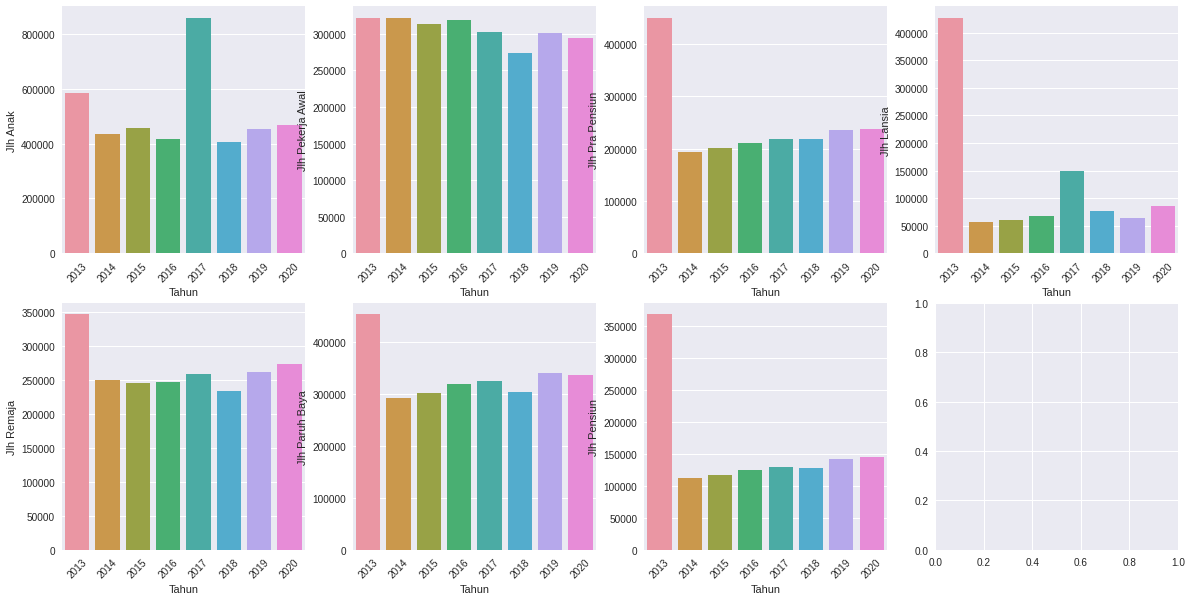

In [ ]:
grafik_per_kot()

**Forecasting**

In [ ]:
dat = df_penduduk[df_penduduk['nama_kabupaten_kota']=='JAKARTA BARAT'].groupby(['tahun'])['jumlah_penduduk'].sum().reset_index()
dat

tahun  jumlah_penduduk
0   2013          3994719
1   2014          2274126
2   2015          2304002
3   2016          2317181
4   2017          2425041
5   2018          2282148
6   2019          2505315
7   2020          2569462

In [ ]:
def series_to_supervised(data, n_in):
    df1 = pd.DataFrame(data)
    
    cols = []
    for i in range(n_in, 0, -1):
        cols.append(df1.shift(i))
        
    cols.append(df1.shift(0))
    
    agg = pd.concat(cols, axis=1)
    agg.dropna(inplace=True)
    return agg.values

In [ ]:
transform = series_to_supervised(dat['jumlah_penduduk'].values, n_in=2)

In [ ]:
transform.shape

(6, 3)

In [ ]:
transform

array([[3994719., 2274126., 2304002.],
       [2274126., 2304002., 2317181.],
       [2304002., 2317181., 2425041.],
       [2317181., 2425041., 2282148.],
       [2425041., 2282148., 2505315.],
       [2282148., 2505315., 2569462.]])

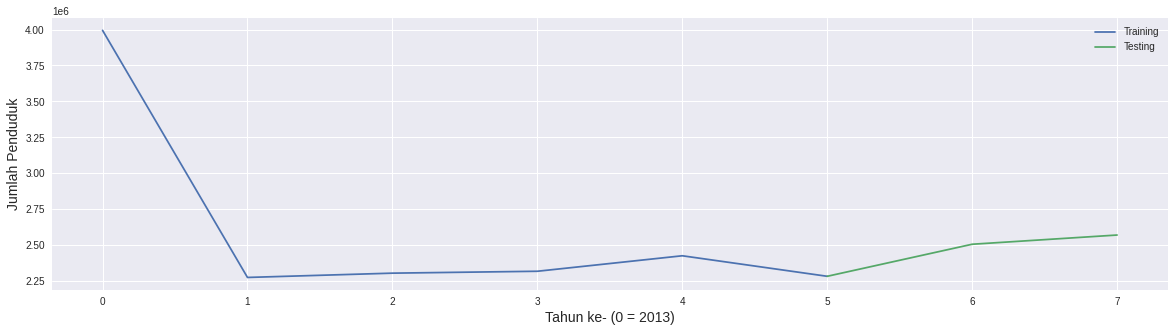

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dat['jumlah_penduduk'][:6], label='Training')
plt.plot(dat['jumlah_penduduk'][5:], label='Testing')
plt.ylabel('Jumlah Penduduk', fontsize=14) # y axis label
plt.xlabel('Tahun ke- (0 = 2013)', fontsize=14) # x axis label
plt.legend()

In [ ]:
train, test = transform[:4, :], transform[4:, :]

In [ ]:
test

array([[2425041., 2282148., 2505315.],
       [2282148., 2505315., 2569462.]])

In [ ]:
predictions = []
history = [x for x in train]

In [ ]:
history

[array([3994719., 2274126., 2304002.]),
 array([2274126., 2304002., 2317181.]),
 array([2304002., 2317181., 2425041.]),
 array([2317181., 2425041., 2282148.])]

Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_DT = DecisionTreeRegressor()
model_RF = RandomForestRegressor()
model_XGB = GradientBoostingRegressor()

In [ ]:
train = np.asarray(history)
train

array([[3994719., 2274126., 2304002.],
       [2274126., 2304002., 2317181.],
       [2304002., 2317181., 2425041.],
       [2317181., 2425041., 2282148.]])

In [ ]:
X_train, y_train = train[:, :-1], train[:, -1]

In [ ]:
X_train

array([[3994719., 2274126.],
       [2274126., 2304002.],
       [2304002., 2317181.],
       [2317181., 2425041.]])

In [ ]:
model_DT.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_XGB.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
pred_DT = []
pred_RF = []
pred_XGB = []

for i in range(len(test)):
    pred_DT.append(model_DT.predict(np.asarray([test[i, :-1]])))
    pred_RF.append(model_RF.predict(np.asarray([test[i, :-1]])))
    pred_XGB.append(model_XGB.predict(np.asarray([test[i, :-1]])))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def MAPE(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))

def RMSE(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [ ]:
evaluation = {
    'Model' : ['DecisionTree', 'RandomForest', 'XGBoost'],
    'MAE' : [],
    'RMSE' : [],
    'MAPE' : []
}

In [ ]:
predictions = [pred_DT, pred_RF, pred_XGB]

for pred in predictions:
    evaluation['MAE'].append(mean_absolute_error(test[:, -1], pred))
    evaluation['RMSE'].append(RMSE(test[:, -1], pred))
    evaluation['MAPE'].append(MAPE(test[:, -1], pred))

In [ ]:
pd.DataFrame(evaluation).sort_values('MAPE')

Model            MAE           RMSE      MAPE
1  RandomForest  197983.030000  198191.989929  0.077879
2       XGBoost  207366.942884  207381.636194  0.081578
0  DecisionTree  226797.000000  228224.261342  0.089237

In [ ]:
pred_RF

[array([2316430.58]), array([2362380.36])]

In [ ]:
np.round(pred_RF, decimals = 0)

array([[2316431.],
       [2362380.]])

In [ ]:
test[:, -1]

array([2505315., 2569462.])

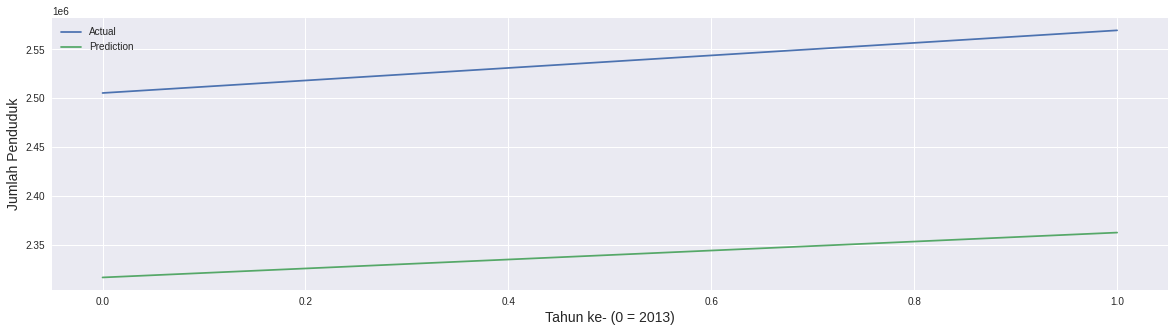

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(test[:, -1], label='Actual')
plt.plot(np.asarray(pred_RF), label='Prediction')
plt.ylabel('Jumlah Penduduk', fontsize=14) # y axis label
plt.xlabel('Tahun ke- (0 = 2013)', fontsize=14) # x axis label
plt.legend()

In [ ]:
values = dat['jumlah_penduduk'].values

In [ ]:
train = series_to_supervised(values, n_in=2)

trainX, trainY = train[:,:-1], train[:, -1]

In [ ]:
model = RandomForestRegressor()
model.fit(trainX, trainY)

RandomForestRegressor()

In [ ]:
forecast = []
nilai = list(values)

for i in range(10):
    row = np.asarray(nilai[-2:]).flatten()
    y = model.predict(np.asarray([row]))
    nilai.append(y)
    forecast.append(y)
print('selesai')

selesai


In [ ]:
hasil_forecast = []

for i in range(len(forecast)):
    hasil_forecast.append(forecast[i][0])

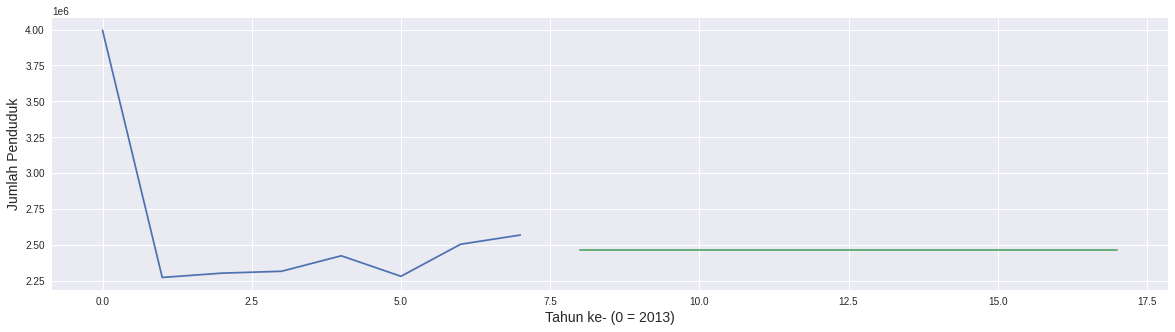

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dat['jumlah_penduduk'])
plt.ylabel('Jumlah Penduduk', fontsize=14) # y axis label
plt.xlabel('Tahun ke- (0 = 2013)', fontsize=14) # x axis label
plt.plot(np.asarray(range(8,18)),np.asarray(hasil_forecast))
#plt.plot(np.asarray(range(8,18)),np.asarray(hasil_forecast + evaluation['MAE'][1]))
#plt.plot(np.asarray(range(8,18)),np.asarray(hasil_forecast - evaluation['MAE'][1]))

**Multiple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dmlr = pd.read_csv('https://raw.githubusercontent.com/fachriomee/datapendudukdki/main/all_gabungan.csv')
dmlr.head()

tahun nama_provinsi    nama_kabupaten_kota  jumlah_penduduk  \
0   2013   DKI Jakarta  ADM. KEPULAUAN SERIBU            24547   
1   2013   DKI Jakarta          JAKARTA BARAT          3994719   
2   2013   DKI Jakarta          JAKARTA PUSAT          1096579   
3   2013   DKI Jakarta        JAKARTA SELATAN          2101369   
4   2013   DKI Jakarta          JAKARTA TIMUR          2832515   

   persentase_penduduk_miskin  persentase_pengangguran  Jumlah Sekolah  \
0                       11.01                     5.47              14   
1                        3.46                     8.35             676   
2                        3.70                     8.16             395   
3                        3.47                     8.25             677   
4                        3.10                     8.99             825   

   Jumlah Guru  Jumlah Murid  persentase_produktif  persentase_lansia  \
0          205          2500                 62.93               2.69   
1         8929        184456                 65.38              15.17   
2         4477         82361                 71.29               5.28   
3        12612        175106                 70.76               3.86   
4        11750        250531                 71.09               3.29   

   luas_wilayah_km2  kepadatan_jiwa_per_km2  Ibu_Pekerja  Ibu_Bukan_Pekerja  
0             11.81                 17789.0           42                219  
1            127.11               1556852.0        10277              20370  
2             48.08               1291277.0         2567               3960  
3            145.73               1103949.0         3126               7011  
4            188.19               1340199.0        28997              30039

In [ ]:
dmlr[dmlr['tahun']==2020]

tahun    nama_kabupaten_kota  jumlah_penduduk  persentase_penduduk_miskin  \
42   2020  ADM. KEPULAUAN SERIBU            29230                       14.87   
43   2020          JAKARTA BARAT          2569462                        4.25   
44   2020          JAKARTA PUSAT          1153399                        4.51   
45   2020        JAKARTA SELATAN          2367002                        3.43   
46   2020          JAKARTA TIMUR          3234003                        4.16   
47   2020          JAKARTA UTARA          1843537                        6.78   

    persentase_pengangguran  Jumlah Sekolah  Jumlah Guru  Jumlah Murid  \
42                     7.37              14          164          2549   
43                    12.27             599         8380        185166   
44                    10.97             279         3890         80522   
45                    10.79             488         8414        166193   
46                     9.29             639        11243        247836   
47                    11.79             345         5833        132539   

    persentase_produktif  persentase_lansia  luas_wilayah_km2  \
42                 63.85               3.51              8.70   
43                 70.48               4.86            130.49   
44                 70.59               6.70             48.13   
45                 70.89               5.07            144.57   
46                 70.42               4.61            188.33   
47                 69.74               4.70            137.56   

    kepadatan_jiwa_per_km2  Ibu_Pekerja  Ibu_Bukan_Pekerja  
42                 28661.0           87                339  
43               1622709.0        10325               9800  
44               1441617.0         4604               4484  
45               1218526.0         8040               9398  
46               1485652.0        13380              16060  
47                643137.0         7751              11048

In [ ]:
dmlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tahun                       48 non-null     int64  
 1   nama_provinsi               48 non-null     object 
 2   nama_kabupaten_kota         48 non-null     object 
 3   jumlah_penduduk             48 non-null     int64  
 4   persentase_penduduk_miskin  48 non-null     float64
 5   persentase_pengangguran     48 non-null     float64
 6   Jumlah Sekolah              48 non-null     int64  
 7   Jumlah Guru                 48 non-null     int64  
 8   Jumlah Murid                48 non-null     int64  
 9   persentase_produktif        48 non-null     float64
 10  persentase_lansia           48 non-null     float64
 11  luas_wilayah_km2            48 non-null     float64
 12  kepadatan_jiwa_per_km2      48 non-null     float64
 13  Ibu_Pekerja                 48 non-nu

In [ ]:
dmlr = dmlr.drop(['nama_provinsi'],axis=1)

In [ ]:
#Encoding Kab/Kota

#from sklearn.preprocessing import LabelEncoder
#lE = LabelEncoder()

In [ ]:
#dmlr['nama_kabupaten_kota'] = lE.fit_transform(dmlr['nama_kabupaten_kota'])

In [ ]:
dmlr2 = pd.get_dummies(dmlr, columns=['nama_kabupaten_kota'], prefix=['kabkot'])
# 0 = Kep. Seribu, 1 = Jakbar, 2 = Jakpus, 3 = Jaksel, 4 = Jaktim, 5 = Jakut

In [ ]:
dmlr2.drop(columns='tahun', inplace=True)
dmlr2.head()

jumlah_penduduk  persentase_penduduk_miskin  persentase_pengangguran  \
0            24547                       11.01                     5.47   
1          3994719                        3.46                     8.35   
2          1096579                        3.70                     8.16   
3          2101369                        3.47                     8.25   
4          2832515                        3.10                     8.99   

   Jumlah Sekolah  Jumlah Guru  Jumlah Murid  persentase_produktif  \
0              14          205          2500                 62.93   
1             676         8929        184456                 65.38   
2             395         4477         82361                 71.29   
3             677        12612        175106                 70.76   
4             825        11750        250531                 71.09   

   persentase_lansia  luas_wilayah_km2  kepadatan_jiwa_per_km2  Ibu_Pekerja  \
0               2.69             11.81                 17789.0           42   
1              15.17            127.11               1556852.0        10277   
2               5.28             48.08               1291277.0         2567   
3               3.86            145.73               1103949.0         3126   
4               3.29            188.19               1340199.0        28997   

   Ibu_Bukan_Pekerja  kabkot_ADM. KEPULAUAN SERIBU  kabkot_JAKARTA BARAT  \
0                219                             1                     0   
1              20370                             0                     1   
2               3960                             0                     0   
3               7011                             0                     0   
4              30039                             0                     0   

   kabkot_JAKARTA PUSAT  kabkot_JAKARTA SELATAN  kabkot_JAKARTA TIMUR  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     1                       0                     0   
3                     0                       1                     0   
4                     0                       0                     1   

   kabkot_JAKARTA UTARA  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
dmlr2.columns

Index(['jumlah_penduduk', 'persentase_penduduk_miskin',
       'persentase_pengangguran', 'Jumlah Sekolah', 'Jumlah Guru',
       'Jumlah Murid', 'persentase_produktif', 'persentase_lansia',
       'luas_wilayah_km2', 'kepadatan_jiwa_per_km2', 'Ibu_Pekerja',
       'Ibu_Bukan_Pekerja', 'kabkot_ADM. KEPULAUAN SERIBU',
       'kabkot_JAKARTA BARAT', 'kabkot_JAKARTA PUSAT',
       'kabkot_JAKARTA SELATAN', 'kabkot_JAKARTA TIMUR',
       'kabkot_JAKARTA UTARA'],
      dtype='object')

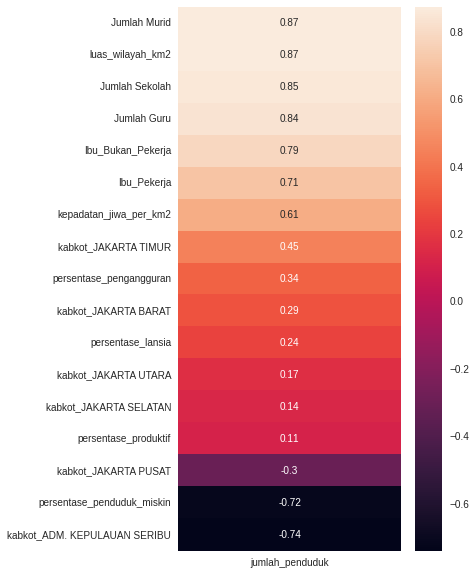

In [ ]:
plt.figure(figsize=(5, 10))
sns.heatmap(dmlr2.corr().sort_values('jumlah_penduduk', ascending=False)[['jumlah_penduduk']][1:], annot=True)

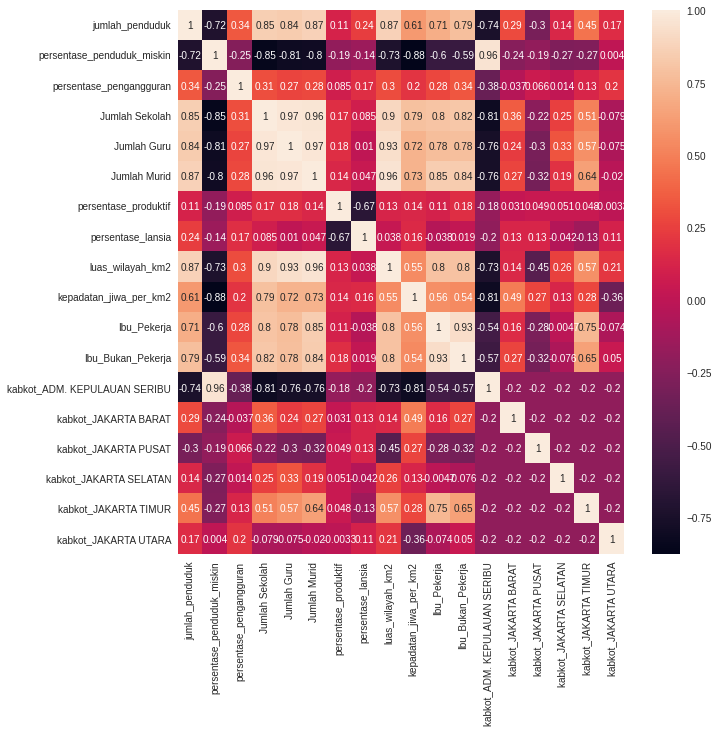

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dmlr2.corr(), annot = True)

In [ ]:
x = dmlr2.drop('jumlah_penduduk', axis=1)
y = dmlr2['jumlah_penduduk'] #Target Variable (Label)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.125, shuffle=False)
#0.125 merepresentasikan 6 data Kab/Kota 2020

mlr = LinearRegression()
mlr.fit(x_train, y_train)

print(mlr.intercept_)
print(mlr.coef_)

-2038596.9654848815
[ 1.46703315e+05 -1.67361957e+05 -3.19972936e+03 -5.40841526e+01
  4.83203215e+01  1.01031172e+04  1.01533696e+05  8.27637423e+03
 -3.10282371e+00 -5.99064924e+01  1.06427484e+02  1.75796558e+05
  5.52262428e+05  3.43742798e+06 -8.50221640e+04 -2.80924387e+06
 -1.27122093e+06]


In [ ]:
pd.DataFrame({'Variables': x.columns, 'Coef':mlr.coef_})

Variables          Coef
0     persentase_penduduk_miskin  1.467033e+05
1        persentase_pengangguran -1.673620e+05
2                 Jumlah Sekolah -3.199729e+03
3                    Jumlah Guru -5.408415e+01
4                   Jumlah Murid  4.832032e+01
5           persentase_produktif  1.010312e+04
6              persentase_lansia  1.015337e+05
7               luas_wilayah_km2  8.276374e+03
8         kepadatan_jiwa_per_km2 -3.102824e+00
9                    Ibu_Pekerja -5.990649e+01
10             Ibu_Bukan_Pekerja  1.064275e+02
11  kabkot_ADM. KEPULAUAN SERIBU  1.757966e+05
12          kabkot_JAKARTA BARAT  5.522624e+05
13          kabkot_JAKARTA PUSAT  3.437428e+06
14        kabkot_JAKARTA SELATAN -8.502216e+04
15          kabkot_JAKARTA TIMUR -2.809244e+06
16          kabkot_JAKARTA UTARA -1.271221e+06

Text(0.5, 0, 'Kabupaten Kota')

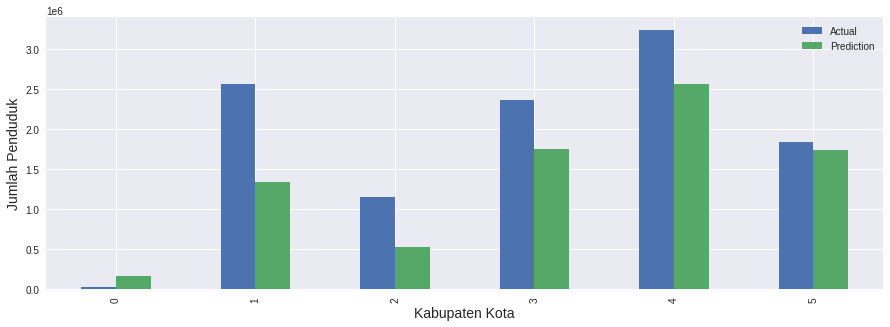

In [ ]:
y_pred = mlr.predict(x_test)
compare = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred}).reset_index().iloc[:, 1:]
compare.plot(kind='bar', figsize=(15, 5))
plt.ylabel('Jumlah Penduduk', fontsize=14) # y axis label
plt.xlabel('Kabupaten Kota', fontsize=14) # x axis label

In [ ]:
y_test

42      29230
43    2569462
44    1153399
45    2367002
46    3234003
47    1843537
Name: jumlah_penduduk, dtype: int64

In [ ]:
np.round(y_pred)

array([ 170132., 1336021.,  532364., 1752892., 2566654., 1732813.])

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = metrics.r2_score(y_test, y_pred)

print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2_Score  : ', r2_score)

MAE :  316861.2788860548
MSE :  173555111478.64258
RMSE :  416599.46168789343
R2_Score  :  0.8154275151855329


***Regularization for Multiple Linear Regression***

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)

r_pred = ridge.predict(x_test)
l_pred = lasso.predict(x_test)
e_pred = elastic.predict(x_test)
lr_pred = y_pred

all_pred = pd.DataFrame({'Actual': y_test, 
                         'LinearRegression': lr_pred, 
                         'Ridge':r_pred, 
                         'Lasso':l_pred, 
                         'ElasticNet':e_pred})
all_pred = all_pred.reset_index().iloc[:, 1:]
all_pred

Actual  LinearRegression         Ridge         Lasso    ElasticNet
0  1797871      2.252289e+06  2.067416e+06  2.134949e+06  2.102417e+06
1  2935685      2.691808e+06  2.799348e+06  2.820236e+06  2.831112e+06
2    25101     -3.500396e+04 -8.299926e+03 -6.851325e+04 -3.459335e+03
3  2505315      1.657931e+06  1.466609e+06  1.574200e+06  1.559776e+06
4  2304002      2.522622e+06  2.589901e+06  2.441713e+06  2.656586e+06
5  1127593      1.050828e+06  9.453755e+05  9.557029e+05  9.653106e+05

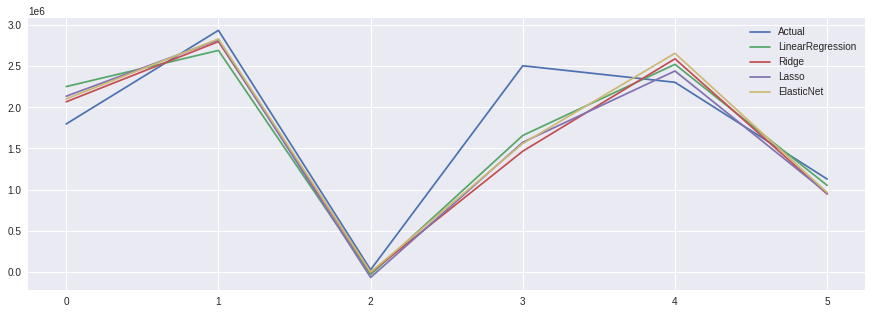

In [ ]:
all_pred.plot(kind='line', figsize=(15, 5))


In [ ]:
model = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
model_pred = [lr_pred, r_pred, l_pred, e_pred]
mae= []
mse = []
rmse = []
r2_score = []

for i in range(len(model)):
    mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
    mse.append(metrics.mean_squared_error(y_test, model_pred[i]))    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))    
    r2_score.append(metrics.r2_score(y_test, model_pred[i]))    

pd.DataFrame({'MAE': mae, 'MSE':mse, 'RMSE': rmse, 'R2_Score':r2_score}, index=model).sort_values('RMSE')

MAE           MSE           RMSE  R2_Score
Linear Regression  316861.278886  1.735551e+11  416599.461688  0.815428
Lasso              297809.439869  1.751998e+11  418568.764113  0.813678
ElasticNet         316347.452503  1.915323e+11  437644.064635  0.796309
Ridge              324350.755577  2.143681e+11  462998.989774  0.772024